# Week 3: Neural Networks

## Implementation of the Neural Network Model 
Apply matrix mutliplication to build a single perceptron neural network (linear regression model). Part of the codes (Optimization with gradient descent) are from the course Calculus for Machine Learning and Data Science.

The general methodology to build a neural network is to:
1. Define the neural network structure ( # of input units, # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
- Implement forward propagation (calculate the perceptron output),
- Implement backward propagation (to get the required corrections for the parameters),
- Update parameters
4. Make predictions

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import make_regression

### 0. Dataset

In [20]:
m = 30 
X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)
X, Y = X.reshape((1, m)), Y.reshape((1, m))

Text(0, 0.5, 'Y')

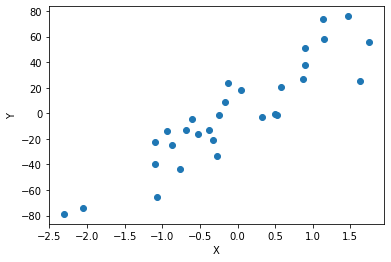

In [27]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

### 1. Define the Neural Network Structure
Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [28]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_y)

In [29]:
(n_x, n_y) = layer_sizes(X, Y)

### 2. Initialize the model's parameters
Initialize the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [30]:
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    parameters = {"W": W, "b": b} # dictionary of parameters
    return parameters

In [35]:
parameters = initialize_parameters(n_x, n_y)
parameters

{'W': array([[-0.01194915]]), 'b': array([[0.]])}

### 3. Implement forward propagation
- Retrieve parameters from the dictionary "parameters"
- Implement forward propagation: compute Z (Y_hat) multiplying arrays W, X, and adding bias b. 

In [32]:
def forward_propagation(X, parameters):
    W = parameters["W"]
    b = parameters["b"]
    Z = np.dot(W, X) + b # W @ X + b
    return Z

In [36]:
Y_hat = forward_propagation(X, parameters)
Y_hat

array([[-0.00381225,  0.01282107, -0.01034089,  0.00206037, -0.01367848,
        -0.00600438,  0.02750144,  0.00816997,  0.00458912,  0.01048966,
         0.02461694,  0.01315147,  0.01314277, -0.01354758, -0.02084902,
         0.00146843,  0.01118165, -0.01940955, -0.01747095, -0.01077324,
         0.00909578, -0.0063373 ,  0.0063112 ,  0.00320104, -0.00696415,
        -0.00050442, -0.01076447,  0.00297976,  0.00730997,  0.00385261]])

### 4. Define cost function to train the model
$$\mathcal{L}\left(W, b\right)  = \frac{1}{2m}\sum_{i=1}^{m}  \large\left(\small \hat{y}^{(i)} - y^{(i)}  \large  \right)^2 \small.$$

In [39]:
def compute_cost(Y_hat, Y):
    m = Y.shape[1]
    cost = np.sum((Y_hat - Y) ** 2) / (2 * m)
    return cost

In [40]:
cost = compute_cost(Y_hat, Y)
cost

791.303809326908

### 5. Optimize Cost function by Gradient Descent
The aim is to optimize the loss function by adjusting the weights and bias. This process is Backward Propagation.
- Calculate gradients by backward propagation
\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\tag{5}\end{align}
- Update parameters from the gradients calculated above
\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.\end{align}

In [42]:
def backward_propagation(Y_hat, X, Y):

    m = X.shape[1] # number of observations

    dZ = Y_hat - Y # difference between prediction and true value
    dW = 1/m * np.matmul(dZ, X.T) # derivative of cost with respect to W
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True) # derivative of cost with respect to b
    grads = {"dW": dW,
            "db": db}
    return grads

In [43]:
grads = backward_propagation(Y_hat, X, Y)
grads

{'dW': array([[-36.37697291]]), 'db': array([[-0.14759876]])}

In [44]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W = parameters["W"]
    b = parameters["b"]
    dW = grads["dW"]
    db = grads["db"]

    W = W - learning_rate * dW
    b = b - learning_rate * db
    parameters = {"W": W, "b": b}
    return parameters

In [45]:
updated_params = update_parameters(parameters, grads)
updated_params

{'W': array([[43.64041833]]), 'b': array([[0.17711852]])}

### 6. Build Neural Networks

In [57]:
def nn_model(X, Y, num_iterations=10, learning_rate=0.1, print_cost=False):
    n_x, n_y = layer_sizes(X, Y)[0], layer_sizes(X, Y)[1]
    parameters = initialize_parameters(n_x, n_y)
    for i in range(num_iterations): # iteration for gradient descent
        Y_hat = forward_propagation(X, parameters) # predict (with current parameters)
        cost = compute_cost(Y_hat, Y) # calculate cost
        grads = backward_propagation(Y_hat, X, Y) # calculate gradients
        parameters = update_parameters(parameters, grads, learning_rate) # update parametesr
        if print_cost:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

In [58]:
parameters = nn_model(X, Y, num_iterations=100, learning_rate=0.1, print_cost=True)
parameters

Cost after iteration 0: 790.2889207901632
Cost after iteration 1: 664.9133077236728
Cost after iteration 2: 563.8328902256061
Cost after iteration 3: 482.3251456361357
Cost after iteration 4: 416.58828938282016
Cost after iteration 5: 363.5612378436035
Cost after iteration 6: 320.778873426512
Cost after iteration 7: 286.2556711993414
Cost after iteration 8: 258.39211445191955
Cost after iteration 9: 235.89942432454987
Cost after iteration 10: 217.73900961489758
Cost after iteration 11: 203.07374998588293
Cost after iteration 12: 191.2287934332174
Cost after iteration 13: 181.6600046086061
Cost after iteration 14: 173.9285665448223
Cost after iteration 15: 167.68053222419485
Cost after iteration 16: 162.63035849488998
Cost after iteration 17: 158.54764447830408
Cost after iteration 18: 155.24644897865716
Cost after iteration 19: 152.57668384639877
Cost after iteration 20: 150.4171786536884
Cost after iteration 21: 148.67009114296226
Cost after iteration 22: 147.25640150524268
Cost after

{'W': array([[35.71861575]]), 'b': array([[2.28863187]])}

### 7. Make Predictions

In [59]:
def predict(X, parameters): 
    W = parameters["W"]
    b = parameters["b"]
    Z = W @ X + b
    return Z

In [63]:
Y_hat = predict(X, parameters)
Y_hat

array([[ 13.68426675, -36.03632205,  33.19979445,  -3.87026502,
         43.17657821,  20.23703408, -79.91914448, -22.13318081,
        -11.42925805, -29.06725564, -71.29674252, -37.02396161,
        -36.99796167,  42.78530693,  64.61089284,  -2.10083687,
        -31.13575698,  60.30799976,  54.51310346,  34.49220439,
        -24.90062493,  21.232195  , -16.576932  ,  -7.27995951,
         23.10598455,   3.79644847,  34.46595937,  -6.61853275,
        -19.5624604 ,  -9.22766435]])

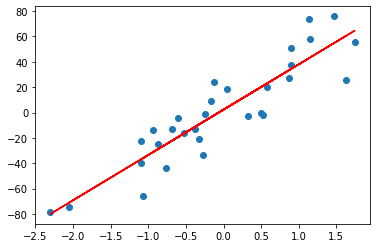

In [69]:
plt.scatter(X, Y) # directly plot the data points
plt.plot(X.flatten(), Y_hat.flatten(), color='red') # convert the arrays into 1D to plot them as a line graph